In [2]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

alcohol	sugar	pH: 수소이온농도 - 화이트와인, 레드와인을 분류하는 모델 구현

In [3]:
wine = pd.read_csv('https://bit.ly/wine-date')
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [4]:
# 데이터 확인

# nan,0, 타입, 데이터 간격
# str에 대한 데이터 분리
# wine.describe()
# wine.info()
# 결과값의 파악 : class 
# hist그래프 출력
# 각각 피쳐간 상관관계 corr, heatmap
# - 피쳐간 관계 : 비슷한 피쳐는 삭제
# 각각 피쳐를 출력 subplots 각각 데이터 분포 파악 
# ( 0 데이터가 어느정도 있는지, 데이터 분포가 어떻게 되는지 )

# 결과값 파악

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
# 결과 0,1
wine['class'].unique()


array([0., 1.])

In [8]:
wine['class'].value_counts()

class
1.0    4898
0.0    1599
Name: count, dtype: int64

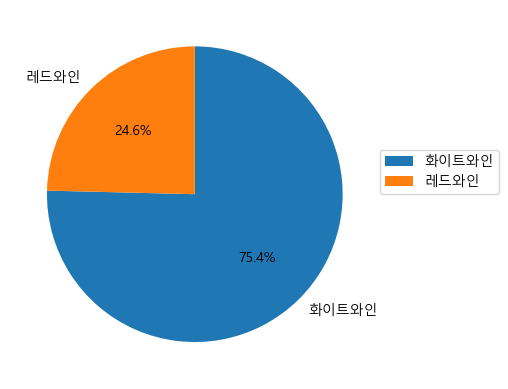

In [9]:
labels = ['화이트와인','레드와인']
plt.pie(wine['class'].value_counts(),
        labels = labels,autopct='%0.1f%%',startangle=90, counterclock=False)
# plt.title('graph')
plt.legend(loc=(1,0.5))
plt.show()

In [10]:
import seaborn as sns

<Axes: >

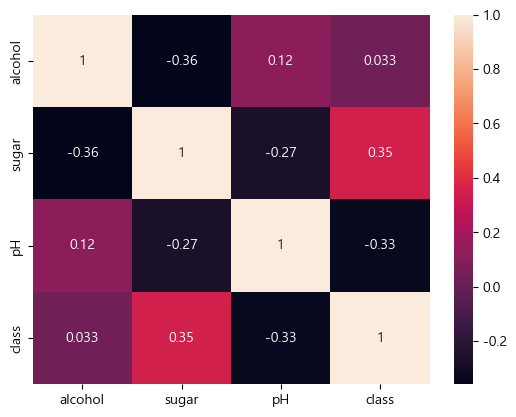

In [11]:
corr = wine.corr(method='pearson')
sns.heatmap(corr,annot = True)

In [12]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [13]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [14]:
# 0.25
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(
    data,target, random_state=42
)

In [15]:
# 표준화 작업
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [16]:
# 데이터 실습
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)

print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7859195402298851
0.7655384615384615


In [17]:
### 경사하강법 머신러닝 훈련
from sklearn.linear_model import SGDClassifier

In [18]:
sc = SGDClassifier(loss='log_loss' ,random_state=42)

train_score = []
test_score = []
classes = np.unique(train_target)

In [19]:
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes = classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

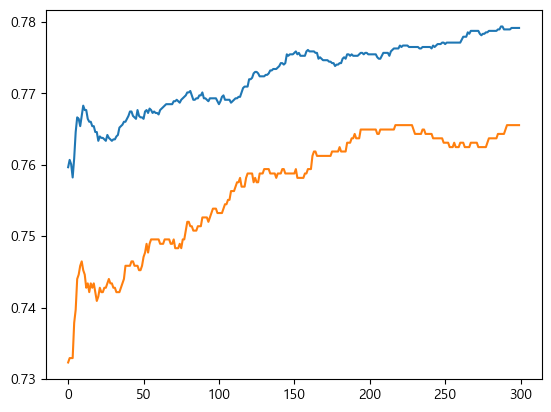

In [20]:
plt.plot(train_score)
plt.plot(test_score)

In [21]:
# 피쳐 너무 적고, 정답률 높지 않아서... 다른 모델을 대입해서 사용

In [22]:
# 결정트리 모델
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

# 순수노드 나올때까지 훈련
# 과대적합 - 85% 대면 높은 정답률을 가짐.

0.9973316912972086
0.8516923076923076


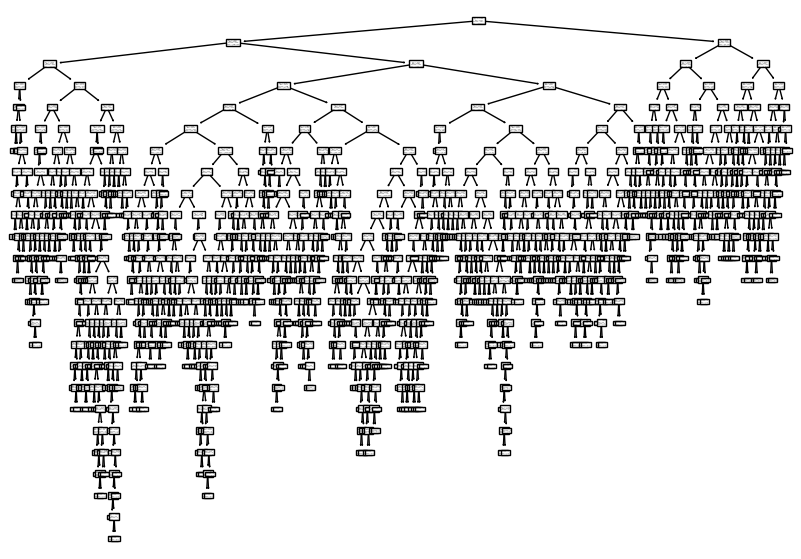

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

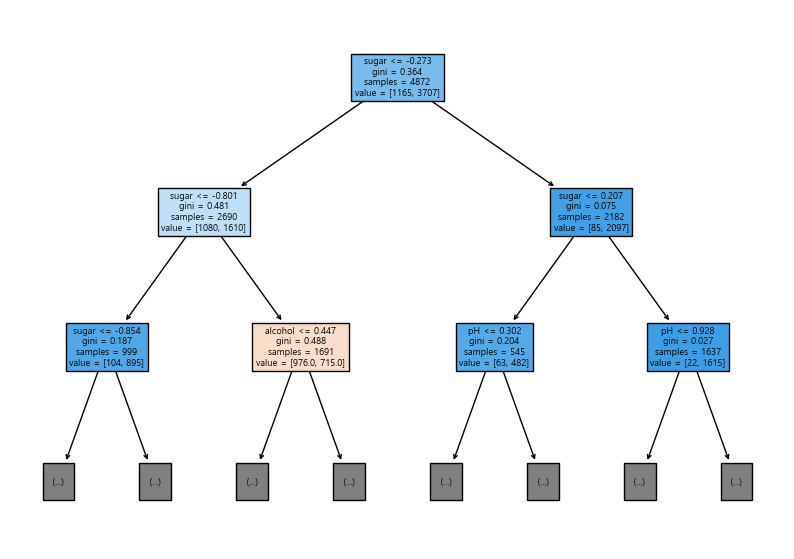

In [24]:
plt.figure(figsize=(10,7))
# max_depth : 가지의 깊이 조정
# filled : 색상조정, 찐한 파란색-양성클래스,1 주황색-음성클래스,0
plot_tree(dt, max_depth=2,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [31]:
# 가지치기를 해서 과대 적합 문제를 해결
# 3,4,5,6...10 가장 효율이 좋은 모델을 적용
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8499589490968801
0.8363076923076923


In [26]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

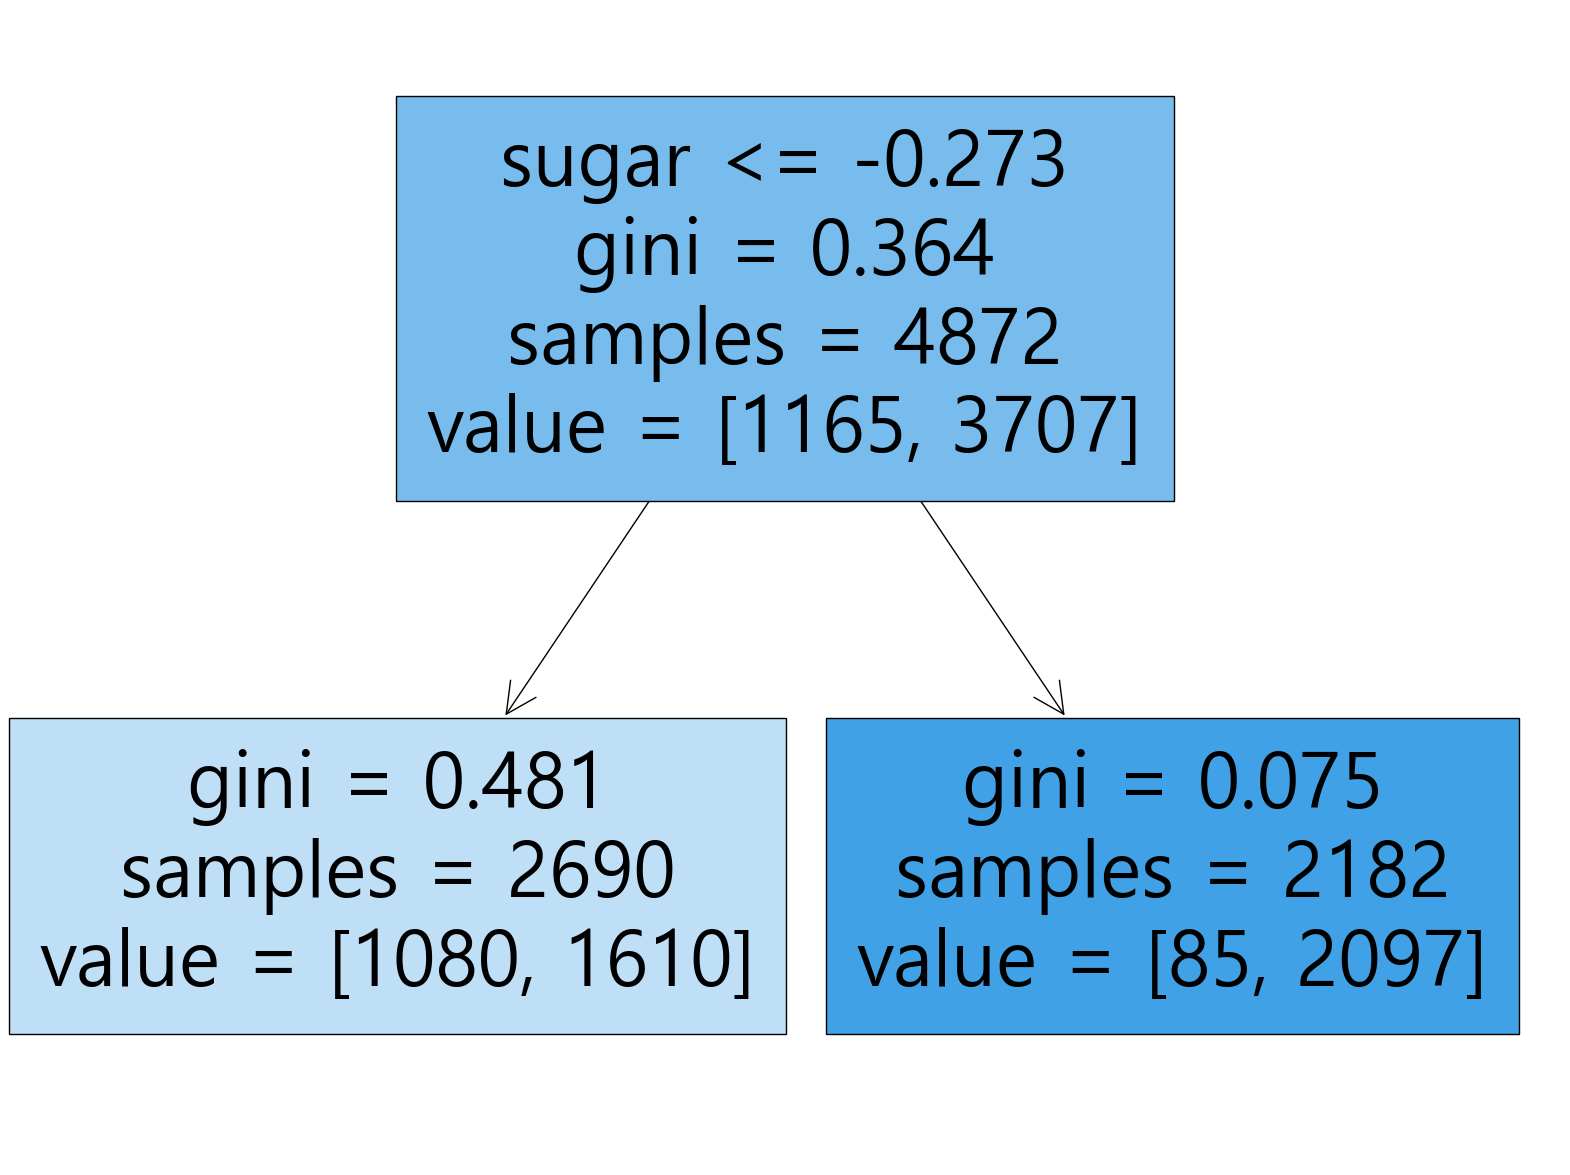

In [27]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=wine.columns)
plt.show()

In [28]:
# 가지치기를 해서 과대 적합 문제를 해결
# 3,4,5,6...10 가장 효율이 좋은 모델을 적용
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8499589490968801
0.8363076923076923


In [29]:
# min_impurity_decrease 최소 불순도 조정해서 속도개선, 효율도 올릴수 있도록 모델을 조정
# 부모의 불순도 - 자식의 불순도 크기 큰 쪽을 선택, 차이가 0.005 도 안나면 그 노드에서 결정
# 과대적합 해결 - max_depth, min_impurity_decrease
dt = DecisionTreeClassifier(min_impurity_decrease=0.001,random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8805418719211823
0.8486153846153847
